In [1]:
import warnings
warnings.filterwarnings('ignore' )
import numpy as np
import torch

# Intensity model
from model import Model

# Optimization functions
from solver import initialize, compute_loss, optimizer, training_loop

#Plot intensity and learned kernels
from utils_plot import plot_global_fig, check_tensor
#Simulate Poisson process
from simu_pp import simu

In [2]:
# model parameters
mu_0, alpha_true, mu_true, sig_true   = 1, 0.7, 0.4, 0.4
true_params = np.array([mu_0, alpha_true, mu_true, sig_true])

# simulation parameters
#seed = 42
seed = 0
T = 10000
L = 100
dt = 1 / L
p_task = 0.6

# simulate data
kernel_value, intensity_value, driver_tt, driver, acti_tt, acti = simu(
    true_params, simu_params=[T, L, p_task], seed=seed, plot_intensity=False)

In [4]:
# initialize parameters
#rng = np.random.RandomState(seed=seed)
#p = 0.6  # init parameters are +- p% around true parameters
#init_params = rng.uniform(low=true_params*(1-p), high=true_params*(1+p))
#init_params = init_params.clip(1e-5)

init_params = initialize(driver_tt, acti_tt, T, initializer='smart_start', lower=0, upper=0.8,
               kernel_name='raised_cosine')
baseline_init, alpha_init, m_init, sigma_init = init_params
init_params = [baseline_init, alpha_init[0], m_init[0], sigma_init[0]]
print(f"True parameters: {true_params}")
print(f"Initial parameters: {init_params}")

#### Optimization ####

# parameters
loss_name = 'log-likelihood'  # 'log-likelihood' | 'MSE'
max_iter = 500
kernel_name = 'raised_cosine' # 'raised_cosine' | 'gaussian'
t = torch.arange(0, 1, dt)

# int to have a train/test split, otherwise set at 0 or False
test = 0.3  

def expe(solver='Adam', step_size=1e-3):
    model_raised = Model(t, check_tensor(init_params), dt, kernel_name, loss_name)

    opt =  optimizer(model_raised.parameters(), step_size, solver)

    res_dict = training_loop(model_raised, opt, driver, acti, max_iter, test)

    # plot final figure
    fig = plot_global_fig(intensity_value,
                          est_intensity=res_dict['est_intensity'],
                          true_kernel=kernel_value,
                          est_kernel=res_dict['est_kernel'],
                          pobj=res_dict['pobj'],
                          test_intensity=res_dict['test_intensity'],
                          pval=res_dict['pval'],
                          loss=loss_name,
                          figtitle="res_"+solver+'.pdf')
    return fig



True parameters: [1.  0.7 0.4 0.4]
Initial parameters: [1.0095432315771018, 1.056238212814295, 0.3975482787573765, 0.07193837175848897]


True parameters: [1.  0.7 0.4 0.4]
Initial parameters: [1.0095432315771018, 1.056238212814295, 0.3975482787573765, 0.07193837175848897]
solver: Adam
Fitting model... done (213.0 s.) 
Estimated parameters: [1.05897405 0.7383445  0.39570619 0.31121837]


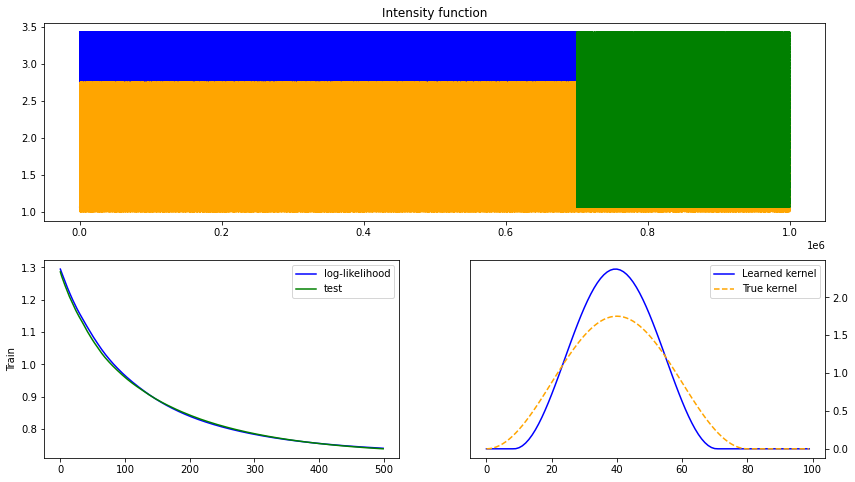

solver: RMSprop
Fitting model... done (232.0 s.) 
Estimated parameters: [1.02853396 0.68070684 0.39668967 0.38251827]


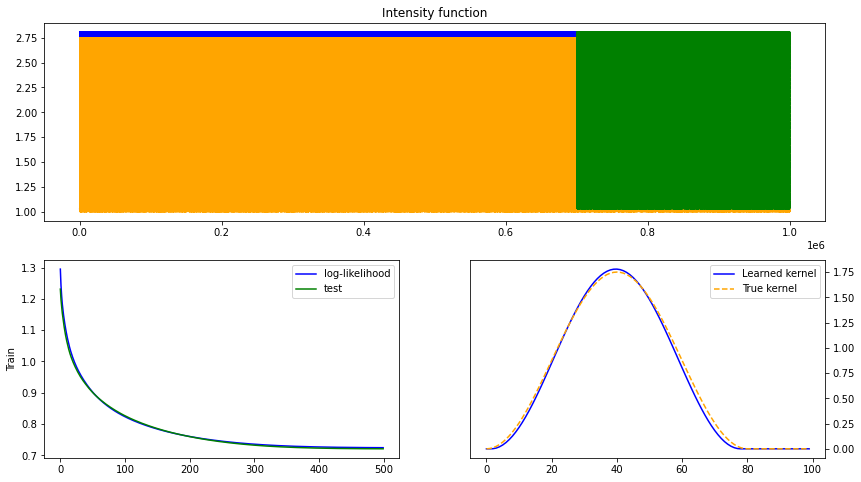

solver: GD
Fitting model... done (236.0 s.) 
Estimated parameters: [0.99444737 0.94512457 0.39650717 0.40177915]


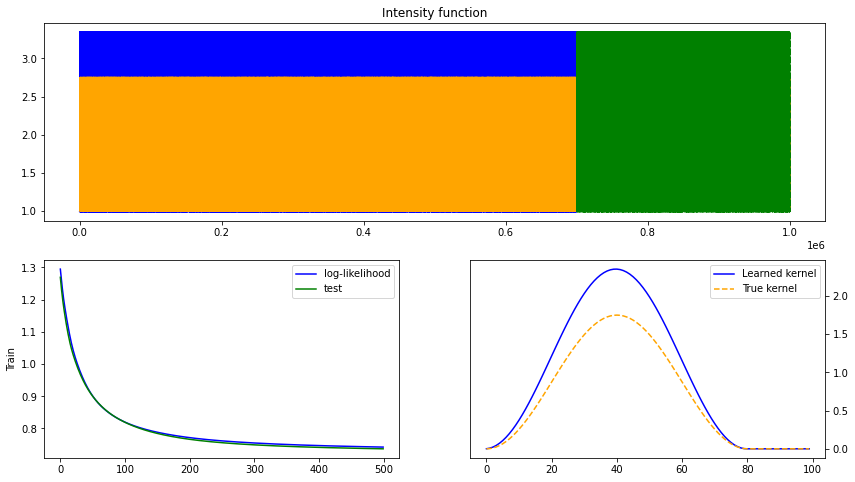

In [3]:

# run gradient descent
for solver in ['Adam', 'RMSprop', 'GD']:  # 'GD' | 'RMSprop' | 'Adam' | 'LBFGS' 
    print(f"solver: {solver}")
    fig = expe(solver, step_size=1e-3)
    



In [ ]:
solver = 'LBFGS'
print(f"solver: {solver}")
expe(solver, step_size=1e-3)

solver: LBFGS


In [ ]:
# model parameters
mu_0, alpha_true, mu_true, sig_true   = 0.8, 0.4, 0.7, 0.2
true_params = np.array([mu_0, alpha_true, mu_true, sig_true])

# simulation parameters
#seed = 42
seed = 0

L = 100
dt = 1 / L
p_task = 0.6

# simulate data
true_kernel, true_intensity, driver_tt, acti_tt, in_poi = simu(
    true_params, simu_params=[T, L, p_task], seed=seed, plot_intensity=False)



# initialize parameters
rng = np.random.RandomState(seed=seed)
p = 0.6  # init parameters are +- p% around true parameters
init_params = rng.uniform(low=true_params*(1-p), high=true_params*(1+p))
init_params = init_params.clip(1e-5)
print(f"True parameters: {true_params}")
print(f"Initial parameters: {init_params}")

#### Optimization ####

# parameters
loss_name = 'log-likelihood'  # 'log-likelihood' | 'MSE'
max_iter = 200
step_size = 1e-2
solver = 'Adam' # 'GD' | 'RMSprop' | 'Adam' | 'LBFGS' 
kernel_name = 'raised_cosine' # 'raised_cosine' | 'gaussian'
t = torch.arange(0, 1, dt)

# int to have a train/test split, otherwise set at 0 or False
test = 0.3  

# run gradient descent
expe('Adam', 1e-3)
expe('RMSprop', 1e-3)
expe('GD', 1e-3)



In [ ]:
# model parameters
mu_0, alpha_true, mu_true, sig_true   = 0.8, 0.4, 0.5, 0.5
true_params = np.array([mu_0, alpha_true, mu_true, sig_true])

# simulation parameters
#seed = 42
seed = 0

L = 100
dt = 1 / L
p_task = 0.6

# simulate data
true_kernel, true_intensity, driver_tt, acti_tt, in_poi = simu(
    true_params, simu_params=[T, L, p_task], seed=seed, plot_intensity=False)



# initialize parameters
rng = np.random.RandomState(seed=seed)
p = 0.6  # init parameters are +- p% around true parameters
init_params = rng.uniform(low=true_params*(1-p), high=true_params*(1+p))
init_params = init_params.clip(1e-5)
print(f"True parameters: {true_params}")
print(f"Initial parameters: {init_params}")

#### Optimization ####

# parameters
loss_name = 'log-likelihood'  # 'log-likelihood' | 'MSE'
max_iter = 200
step_size = 1e-2
solver = 'Adam' # 'GD' | 'RMSprop' | 'Adam' | 'LBFGS' 
kernel_name = 'raised_cosine' # 'raised_cosine' | 'gaussian'
t = torch.arange(0, 1, dt)

# int to have a train/test split, otherwise set at 0 or False
test = 0.3  

# run gradient descent
expe('Adam', 1e-3)
expe('RMSprop', 1e-3)
expe('GD', 1e-3)


In [ ]:
# model parameters
mu_0, alpha_true, mu_true, sig_true   = 2, -0.2, 0.4, 0.4
true_params = np.array([mu_0, alpha_true, mu_true, sig_true])

# simulation parameters
#seed = 42
seed = 0
T = 10000
L = 100
dt = 1 / L
p_task = 0.6

# simulate data
true_kernel, true_intensity, driver_tt, acti_tt, in_poi = simu(
    true_params, simu_params=[T, L, p_task], seed=seed, plot_intensity=False)



# initialize parameters
rng = np.random.RandomState(seed=seed)
p = 0.6  # init parameters are +- p% around true parameters
init_params = rng.uniform(low=true_params*(1-p), high=true_params*(1+p))
init_params = init_params.clip(1e-5)
print(f"True parameters: {true_params}")
print(f"Initial parameters: {init_params}")

#### Optimization ####

# parameters
loss_name = 'log-likelihood'  # 'log-likelihood' | 'MSE'
max_iter = 200
step_size = 1e-2
solver = 'Adam' # 'GD' | 'RMSprop' | 'Adam' | 'LBFGS' 
kernel_name = 'raised_cosine' # 'raised_cosine' | 'gaussian'
t = torch.arange(0, 1, dt)

# int to have a train/test split, otherwise set at 0 or False
test = 0.3  


def expe(solverr=solver, step_size=step_size):
    model_raised = Model(t, check_tensor(init_params), dt, kernel_name, loss_name)

    opt =  optimizer(model_raised.parameters(), step_size, solverr)

    res_dict = training_loop(model_raised, opt, driver_tt, acti_tt, max_iter, test)

    # plot final figure
    fig = plot_global_fig(true_intensity, est_intensity=res_dict['est_intensity'],
                              true_kernel=true_kernel, est_kernel=res_dict['est_kernel'],
                              pobj=res_dict['pobj'], test_intensity=res_dict['test_intensity'],
                              pval=res_dict['pval'], loss=loss_name)
    return 0

# run gradient descent

expe('Adam', 1e-3)
expe('RMSprop', 1e-3)
expe('GD', 1e-3)

In [ ]:
# model parameters
mu_0, alpha_true, mu_true, sig_true   = 0.8, 0.4, 0.5, 0.5
true_params = np.array([mu_0, alpha_true, mu_true, sig_true])

# simulation parameters
#seed = 42
seed = 0

L = 100
dt = 1 / L
p_task = 0.6

# simulate data
true_kernel, true_intensity, driver_tt, acti_tt, in_poi = simu(
    true_params, simu_params=[T, L, p_task], seed=seed, plot_intensity=False)



# initialize parameters
rng = np.random.RandomState(seed=seed)
p = 2  # init parameters are +- p% around true parameters
init_params = rng.uniform(low=true_params*(1-p), high=true_params*(1+p))
init_params = init_params.clip(1e-5)
print(f"True parameters: {true_params}")
print(f"Initial parameters: {init_params}")

#### Optimization ####

# parameters
loss_name = 'log-likelihood'  # 'log-likelihood' | 'MSE'
max_iter = 500
step_size = 1e-2
solver = 'Adam' # 'GD' | 'RMSprop' | 'Adam' | 'LBFGS' 
kernel_name = 'raised_cosine' # 'raised_cosine' | 'gaussian'
t = torch.arange(0, 1, dt)

# int to have a train/test split, otherwise set at 0 or False
test = 0.3  

# run gradient descent
expe('Adam', 1e-3)
expe('RMSprop', 1e-3)
expe('GD', 1e-3)

